## Step 0 | Setup and Imports

In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [ ]:
# Check which files are in your Project folder
os.listdir()

['example_data.csv',
 'cleaned_data.csv',
 'ECON 0150 Final Project.ipynb',
 'final_data.csv']

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data = pd.read_csv('final_data.csv')
# And you can save your dataset after you've worked on it.
data.to_csv('final_data.csv')

## Step 1 (Part 1) | Univariate EDA

Research Question: Are peoples perceptions of corruption associated with a income inequality across countries?

Data Sets: Corruption perception index for data on corruption, GINI coefficient for data on income inequality

Variables:

Predictor - Corruption Perception
Outcome - Income inequality (GINI coefficient)

Descriptive Figure:

Title - Relationship between corruption perception and income inequality

X-Axis - Corruption Perception

Y-Axis - GINI coefficient
- Income a line of best fit
- Discuss visual trends, outliers, general observations, etc.

Statistical Model:
We will use a linear regression model corruption perception index as the predictor variable and GINI as the outcome variable. Our interpretation of our co-efficient will tell us the correlation/effect of our predictor variable on our outcome variable. The interpretation of the b0 intercept coefficient is the income inequality (GINI) when the corruption perception index is zero and the interpretation of the b1 slope coefficient is the rate at which teen income inequality increase for a 1 unit increase in the corruption perception index. Our p-value will tell us whether the relationship between the two variables is statistically significant.

## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

In [ ]:
Corruption = 100 - data['Corruption Perceptions Index']
Income_Inequality = data['GINI Coefficient']

Processed Corruption Perception Index to be inversed. Initially low CPI indicated high corruption. Converted so that low CPI indicates low corruption.

Text(0, 0.5, 'Income Inequality')

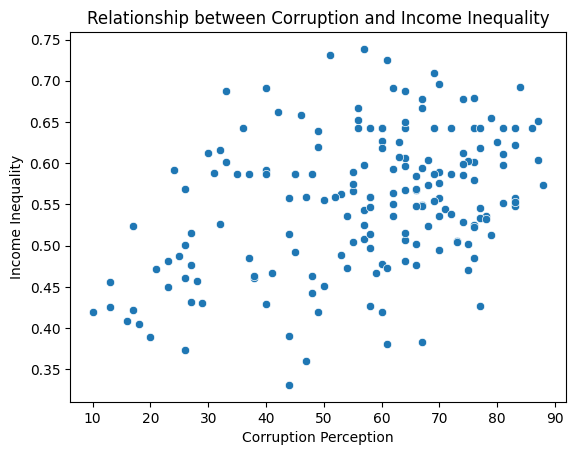

In [ ]:
sns.scatterplot(data=data, x=Corruption, y=Income_Inequality)
plt.title('Relationship between Corruption and Income Inequality')
plt.xlabel('Corruption Perception')
plt.ylabel('Income Inequality')

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

H0: There is no association between corruption and income inequality across countries

H1: There is a significant association between corruption and income inequality across countries

In [ ]:
model = smf.ols(formula='Q("GINI Coefficient") ~ I(100 - Q("Corruption Perceptions Index"))', data=data)
print(model.fit().summary())

                              OLS Regression Results                             
Dep. Variable:     Q("GINI Coefficient")   R-squared:                       0.155
Model:                               OLS   Adj. R-squared:                  0.150
Method:                    Least Squares   F-statistic:                     32.70
Date:                   Fri, 05 Dec 2025   Prob (F-statistic):           4.46e-08
Time:                           18:17:00   Log-Likelihood:                 208.13
No. Observations:                    180   AIC:                            -412.3
Df Residuals:                        178   BIC:                            -405.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Text(0, 0.5, 'Income Inequality')

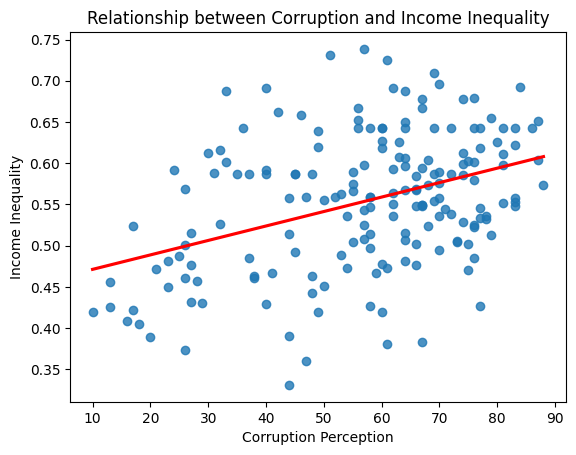

In [ ]:
sns.regplot(data=data, x=Corruption, y=Income_Inequality, ci=None, line_kws={'color': 'red'})
plt.title('Relationship between Corruption and Income Inequality')
plt.xlabel('Corruption Perception')
plt.ylabel('Income Inequality')

According to our simple regression model, our Beta 0 value of 0.4537 tells us the estimated GINI coefficient when the Corruption Perceptions Index is equal to 0. In context, this means that a CPI of 0 would be associated with a GINI value of 0.4537. Our p-value for this intercept is 0.0000 which indicates statistical significance.

Our Beta 1 value of 0.0018 tells us that for every 1 unit increase in the Corruption Perceptions Index, the GINI Coefficient is estimated to increase by 0.0018 units. This positive relationship aligns with general theory: as percieved corruption increases, income inequality increases as well as well. The p-value for this intercept is 0.000 which is highly statistically significant and tells us that the probability of observing a slope as extreme as 0.0018 under the null hypothesis is extremely unlikely. Thus, we have enough evidence to reject the null hypothesis that there is no association between perceived corruption and income inequality across countries.